In [1]:
import os
import json
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from FlowCytometryTools import FCMeasurement

In [2]:
def log_transform(original_sample, channels):
    """
    This function implements a log10 transformation on the data.
    It is preferable to the FCT transforms because they include
    some kind of normalization that I don't understand.
    By: Devin Strickland
    """
    # Copy the original sample
    new_sample = original_sample.copy()
    new_data = new_sample.data
    # log10 transformation of each specified channel
    for c in channels:
        new_data[c] = np.log10(new_data[c])
    new_data = new_data.replace([np.inf, -np.inf], np.nan)
#     new_data = new_data.dropna()  # Removes all NaN entries
    new_sample.data = new_data
    return new_sample

In [3]:
with open('../secrets.json') as jfile:
    secrets_json = json.load(jfile)
    FCS_PATH = secrets_json['FCS_PATH']

In [4]:
cfu_df = pd.read_csv('../data/test/202104/heat_20210419/heat_20210419__cfu_and_meta.csv')
fcs_df = pd.read_csv('../data/test/202104/heat_20210419/heat_20210419__fcs_meta.csv')

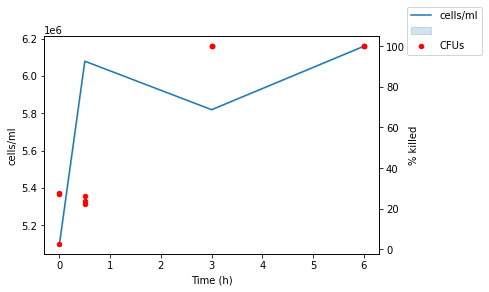

In [5]:
ax = sns.lineplot(data=cfu_df, x='treatment_time', y='culture_cells/ml', legend=False)
ax2 = ax.twinx()
cfu_df.plot(x='treatment_time', y='percent_killed', ax=ax2, legend=False, kind='scatter', color='r')
ax.figure.legend(labels=['cells/ml', '', 'CFUs'], bbox_to_anchor=(1.15, 1), loc='upper right')
ax.set_xlabel('Time (h)')
ax.set_ylabel('cells/ml')
ax2.set_ylabel('% killed')
plt.show()

In [6]:
# cfu_df.head()

In [7]:
fcs_files = fcs_df['fcs_filename'].tolist()[:-2]

In [8]:
fcs_dict = {'0.0': list(), '0.5': list(), '3.0': list(), '6.0': list()}
for tp in fcs_dict.keys():
    for file in fcs_files:
        if tp in file:
            fcs_dict[tp].append(file)

In [9]:
fig = plt.figure(figsize=(17,3))
tps = ['0.0', '0.5', '3.0', '6.0']
fcs_dir = f'{FCS_PATH}/heat_20210419'
channel = 'YL1-H'

for plot_idx, tp in enumerate(tps):
    fcs_pair = fcs_dict[tp]
    plt.subplot(1, 4, plot_idx+1)
    fcs_f1 = FCMeasurement(ID=fcs_pair[0], datafile=f'{fcs_dir}/{fcs_pair[0]}')
    fcs_f1_log = log_transform(fcs_f1, [channel])
    fcs_f2 = FCMeasurement(ID=fcs_pair[1], datafile=f'{fcs_dir}/{fcs_pair[1]}')
    fcs_f2_log = log_transform(fcs_f2, [channel])
                               
    if 'no_stain' in fcs_f1.ID:
        sns.distplot(fcs_f1_log.data[channel].values, bins=100, color='blue', kde=False, norm_hist=True)
    else:
        sns.distplot(fcs_f1_log.data[channel].values, bins=100, color='orange', kde=False, norm_hist=True)
    
    if 'no_stain' in fcs_f2.ID:
        sns.distplot(fcs_f2_log.data[channel].values, bins=100, color='blue', kde=False, norm_hist=True)
    else:
        sns.distplot(fcs_f2_log.data[channel].values, bins=100, color='orange', kde=False, norm_hist=True)   
    plt.title('{} hours'.format(tp))
    plt.xlim(0,6)
    
#     if plot_idx == 0:
#         plt.ylabel('density')
    plt.xlabel(f'{channel}/Sytox')

               
fig.suptitle('55C Killing Time Series. Blue=No Stain. Orange=Stained.', size=20)
plt.tight_layout()
fig.subplots_adjust(top=0.78)
# fig.savefig('ethanol_TS-2.0_flow.png', dpi=300)

/Users/robertmoseley/opt/anaconda3/envs/live_dead_uploader/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/robertmoseley/opt/anaconda3/envs/live_dead_uploader/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


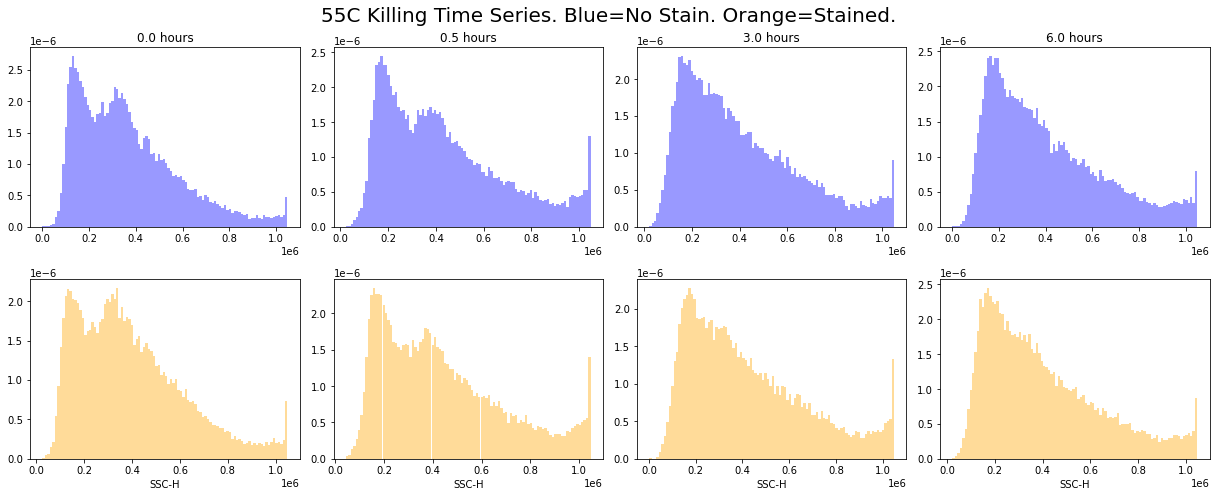

In [10]:
fig = plt.figure(figsize=(17,7))
tps = ['0.0', '0.5', '3.0', '6.0']
fcs_dir = f'{FCS_PATH}/heat_20210419'
channel = 'SSC-H'

for plot_idx, tp in enumerate(tps):
    fcs_pair = fcs_dict[tp]
    fcs_f1 = FCMeasurement(ID=fcs_pair[0], datafile=f'{fcs_dir}/{fcs_pair[0]}')
#     fcs_f1_log = log_transform(fcs_f1, [channel])
    fcs_f2 = FCMeasurement(ID=fcs_pair[1], datafile=f'{fcs_dir}/{fcs_pair[1]}')
#     fcs_f2_log = log_transform(fcs_f2, [channel])
                               
    if 'no_stain' in fcs_f1.ID:
        plt.subplot(2, 4, plot_idx+1)
        sns.distplot(fcs_f1.data[channel].values, bins=100, color='blue', kde=False, norm_hist=True)
    else:
        plt.subplot(2, 4, plot_idx+5)
        sns.distplot(fcs_f1.data[channel].values, bins=100, color='orange', kde=False, norm_hist=True)
        plt.xlabel(f'{channel}')   
        
    if 'no_stain' in fcs_f2.ID:
        plt.subplot(2, 4, plot_idx+1)
        sns.distplot(fcs_f2.data[channel].values, bins=100, color='blue', kde=False, norm_hist=True)
    else:
        plt.subplot(2, 4, plot_idx+5)
        sns.distplot(fcs_f2.data[channel].values, bins=100, color='orange', kde=False, norm_hist=True)
        plt.xlabel(f'{channel}')

    plt.title('{} hours'.format(tp))

               
fig.suptitle('55C Killing Time Series. Blue=No Stain. Orange=Stained.', size=20)
plt.tight_layout()
fig.subplots_adjust(top=0.9)
# fig.savefig('ethanol_TS-2.0_flow.png', dpi=300)

/Users/robertmoseley/opt/anaconda3/envs/live_dead_uploader/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/robertmoseley/opt/anaconda3/envs/live_dead_uploader/lib/python3.7/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/robertmoseley/opt/anaconda3/envs/live_dead_uploader/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/robertmoseley/opt/anaconda3/envs/live_dead_uploader/lib/python3.7/site-packages/ipykernel_launcher.py:26: Ma

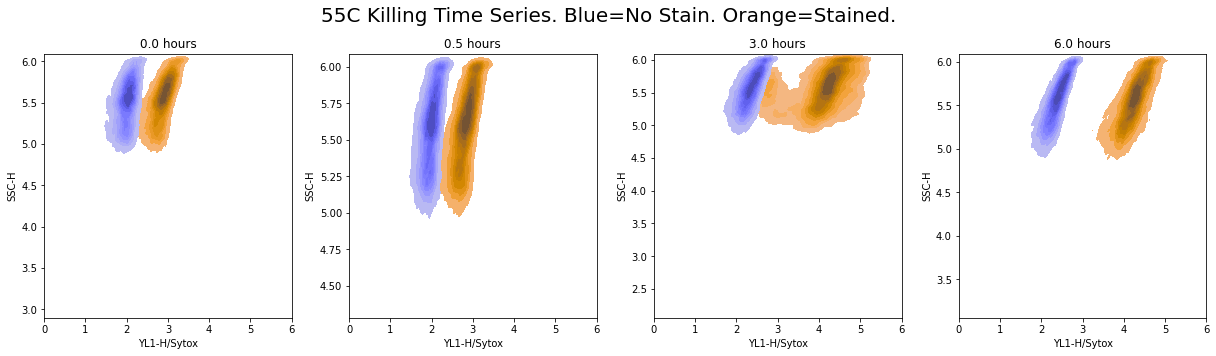

In [12]:
fig = plt.figure(figsize=(17,5))
tps = ['0.0', '0.5', '3.0', '6.0']
fcs_dir = f'{FCS_PATH}/heat_20210419'
channels = ['SSC-H', 'YL1-H']

for plot_idx, tp in enumerate(tps):
    fcs_pair = fcs_dict[tp]
#     plt.subplot(1, 4, plot_idx+1)
    fcs_f1 = FCMeasurement(ID=fcs_pair[0], datafile=f'{fcs_dir}/{fcs_pair[0]}')
    fcs_f1 = log_transform(fcs_f1, channels)
    fcs_f2 = FCMeasurement(ID=fcs_pair[1], datafile=f'{fcs_dir}/{fcs_pair[1]}')
    fcs_f2 = log_transform(fcs_f2, channels)
                               
    if 'no_stain' in fcs_f1.ID:
        plt.subplot(1, 4, plot_idx+1)
#         sns.scatterplot(data=fcs_f1, x=channels[1] , y=channels[0], color='blue')
        sns.kdeplot(data=fcs_f1, x=channels[1] , y=channels[0], color='blue', shade=True, bw_adjust=.5)
#         sns.jointplot(data=fcs_f1, x=channels[1] , y=channels[0], color='blue')
    else:
        plt.subplot(1, 4, plot_idx+1)
#         sns.scatterplot(data=fcs_f1, x=channels[1] , y=channels[0], color='orange')
        sns.kdeplot(data=fcs_f1, x=channels[1] , y=channels[0], color='orange', shade=True, bw_adjust=.5)
#         sns.jointplot(data=fcs_f1, x=channels[1] , y=channels[0], color='orange')
    
    if 'no_stain' in fcs_f2.ID:
        plt.subplot(1, 4, plot_idx+1)
#         sns.scatterplot(data=fcs_f2, x=channels[1] , y=channels[0], color='blue')
        sns.kdeplot(data=fcs_f2, x=channels[1] , y=channels[0], color='blue', shade=True, bw_adjust=.5)
#         sns.jointplot(data=fcs_f2, x=channels[1] , y=channels[0], color='blue')

    else:
        plt.subplot(1, 4, plot_idx+1)
#         sns.scatterplot(data=fcs_f2, x=channels[1] , y=channels[0], color='orange')
        sns.kdeplot(data=fcs_f2, x=channels[1] , y=channels[0], color='orange', shade=True, bw_adjust=.5)
#         sns.jointplot(data=fcs_f2, x=channels[1] , y=channels[0], color='orange')

    plt.title('{} hours'.format(tp))
    plt.xlim(0,6)
    
    if plot_idx == 0:
        plt.ylabel(channels[0])
    plt.xlabel(f'{channels[1]}/Sytox')

               
fig.suptitle('55C Killing Time Series. Blue=No Stain. Orange=Stained.', size=20)
plt.tight_layout()
fig.subplots_adjust(top=0.85)
# fig.savefig('ethanol_TS-2.0_flow.png', dpi=300)

/Users/robertmoseley/opt/anaconda3/envs/live_dead_uploader/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/robertmoseley/opt/anaconda3/envs/live_dead_uploader/lib/python3.7/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/robertmoseley/opt/anaconda3/envs/live_dead_uploader/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/robertmoseley/opt/anaconda3/envs/live_dead_uploader/lib/python3.7/site-packages/ipykernel_launcher.py:26: Ma

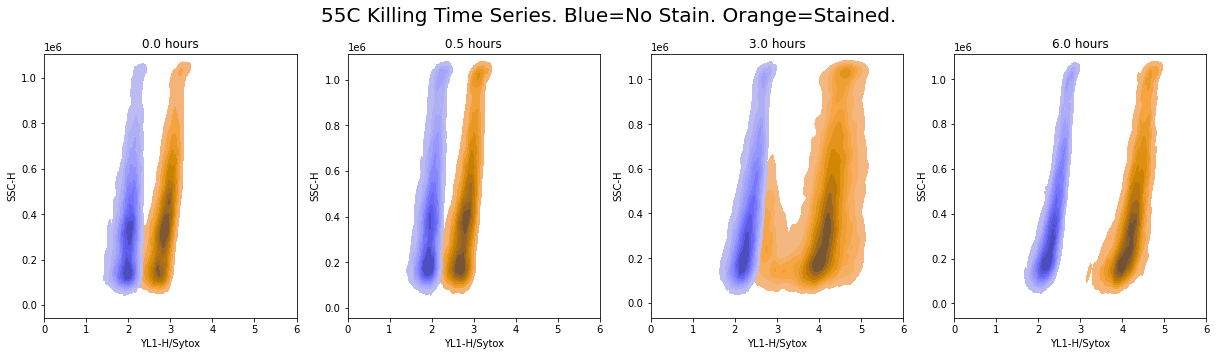

In [14]:
fig = plt.figure(figsize=(17,5))
tps = ['0.0', '0.5', '3.0', '6.0']
fcs_dir = f'{FCS_PATH}/heat_20210419'
channels = ['SSC-H', 'YL1-H']

for plot_idx, tp in enumerate(tps):
    fcs_pair = fcs_dict[tp]
#     plt.subplot(1, 4, plot_idx+1)
    fcs_f1 = FCMeasurement(ID=fcs_pair[0], datafile=f'{fcs_dir}/{fcs_pair[0]}')
    fcs_f1 = log_transform(fcs_f1, [channels[1]])
    fcs_f2 = FCMeasurement(ID=fcs_pair[1], datafile=f'{fcs_dir}/{fcs_pair[1]}')
    fcs_f2 = log_transform(fcs_f2, [channels[1]])
                               
    if 'no_stain' in fcs_f1.ID:
        plt.subplot(1, 4, plot_idx+1)
#         sns.scatterplot(data=fcs_f1, x=channels[1] , y=channels[0], color='blue')
        sns.kdeplot(data=fcs_f1, x=channels[1] , y=channels[0], color='blue', shade=True, bw_adjust=.5)
#         sns.jointplot(data=fcs_f1, x=channels[1] , y=channels[0], color='blue')
    else:
        plt.subplot(1, 4, plot_idx+1)
#         sns.scatterplot(data=fcs_f1, x=channels[1] , y=channels[0], color='orange')
        sns.kdeplot(data=fcs_f1, x=channels[1] , y=channels[0], color='orange', shade=True, bw_adjust=.5)
#         sns.jointplot(data=fcs_f1, x=channels[1] , y=channels[0], color='orange')
    
    if 'no_stain' in fcs_f2.ID:
        plt.subplot(1, 4, plot_idx+1)
#         sns.scatterplot(data=fcs_f2, x=channels[1] , y=channels[0], color='blue')
        sns.kdeplot(data=fcs_f2, x=channels[1] , y=channels[0], color='blue', shade=True, bw_adjust=.5)
#         sns.jointplot(data=fcs_f2, x=channels[1] , y=channels[0], color='blue')

    else:
        plt.subplot(1, 4, plot_idx+1)
#         sns.scatterplot(data=fcs_f2, x=channels[1] , y=channels[0], color='orange')
        sns.kdeplot(data=fcs_f2, x=channels[1] , y=channels[0], color='orange', shade=True, bw_adjust=.5)
#         sns.jointplot(data=fcs_f2, x=channels[1] , y=channels[0], color='orange')

    plt.title('{} hours'.format(tp))
    plt.xlim(0,6)
    
    if plot_idx == 0:
        plt.ylabel(channels[0])
    plt.xlabel(f'{channels[1]}/Sytox')

               
fig.suptitle('55C Killing Time Series. Blue=No Stain. Orange=Stained.', size=20)
plt.tight_layout()
fig.subplots_adjust(top=0.85)
# fig.savefig('ethanol_TS-2.0_flow.png', dpi=300)